## Modelo para predecir la capacidad de resistir fuerzas compresivas de vigas de concreto utilizando modelos GAM

### Importando las librerías básicas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10, 6)

import warnings
warnings.filterwarnings('ignore')

### Importando el dataset

> Importando datos de compresive_strength_concrete.csv

In [2]:
df = pd.read_csv('compresive_strength_concrete.csv')

### Observando el conjunto de datos

> Imprimimos las primeras y últimas 5 observaciones

> Observamos que hay 1030 observaciones, 8 atributos y un vector objetivo

> Nos damos cuenta que los nombres de las variables deberemos redefinirlas

In [3]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
df.rename(columns=lambda x: x.replace(' ', '_').replace('(', '').replace(')', '').replace(',', ''), inplace=True)

In [5]:
df

,Cement_component_1kg_in_a_m^3_mixture,Blast_Furnace_Slag_component_2kg_in_a_m^3_mixture,Fly_Ash_component_3kg_in_a_m^3_mixture,Water__component_4kg_in_a_m^3_mixture,Superplasticizer_component_5kg_in_a_m^3_mixture,Coarse_Aggregate__component_6kg_in_a_m^3_mixture,Fine_Aggregate_component_7kg_in_a_m^3_mixture,Age_day,Concrete_compressive_strengthMPa_megapascals_
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


#### Pequeño resumen de los atributos:

1. **`Cement`:** Cantidad de cemento en la mezcla
2. **`Escoria de altohorno`:** Cantidad de escoria de alto horno en la mezcla.
3. **`ceniza volante`:** Cantidad de ceniza volante en la mezcla.
4. **`agua`:** Cantidad de agua utilizada en la mezcla.
5. **`superplastificante`:** Cantidad de superplastificante agregado a la mezcla para mejorar fluidez.
6. **`agregado grueso`:** Cantidad de agregado grueso o grava en la mezcla.
7. **`agregado fino`:** Cantidad de agregado fino o arena en la mezcla.
8. **`edad`:** Tiempo de curado.
9. **`resistencia a la compresión`:** Vector objetivo. El valor de la resistencia a la compresión del concreto

### Método describe() en el dataset

> El método describe() puede mostrar diferentes valores, como la cantidad, promedio, desviación estándard, valor mínimo, etc. de las variables numéricas

In [6]:
df.describe()

,Cement_component_1kg_in_a_m^3_mixture,Blast_Furnace_Slag_component_2kg_in_a_m^3_mixture,Fly_Ash_component_3kg_in_a_m^3_mixture,Water__component_4kg_in_a_m^3_mixture,Superplasticizer_component_5kg_in_a_m^3_mixture,Coarse_Aggregate__component_6kg_in_a_m^3_mixture,Fine_Aggregate_component_7kg_in_a_m^3_mixture,Age_day,Concrete_compressive_strengthMPa_megapascals_
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Método info()

> Aplicamos este método para ver el tipo de dato y la cantidad de nulos de los atributos

> Vemos que no hay valores nulos en ninguna variable, además que todos los atributos son numéricos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Cement_component_1kg_in_a_m^3_mixture              1030 non-null   float64
 1   Blast_Furnace_Slag_component_2kg_in_a_m^3_mixture  1030 non-null   float64
 2   Fly_Ash_component_3kg_in_a_m^3_mixture             1030 non-null   float64
 3   Water__component_4kg_in_a_m^3_mixture              1030 non-null   float64
 4   Superplasticizer_component_5kg_in_a_m^3_mixture    1030 non-null   float64
 5   Coarse_Aggregate__component_6kg_in_a_m^3_mixture   1030 non-null   float64
 6   Fine_Aggregate_component_7kg_in_a_m^3_mixture      1030 non-null   float64
 7   Age_day                                            1030 non-null   int64  
 8   Concrete_compressive_strengthMPa_megapascals_      1030 non-null   float64
dtypes: float6

### Observamos los valores atípicos de cada variable

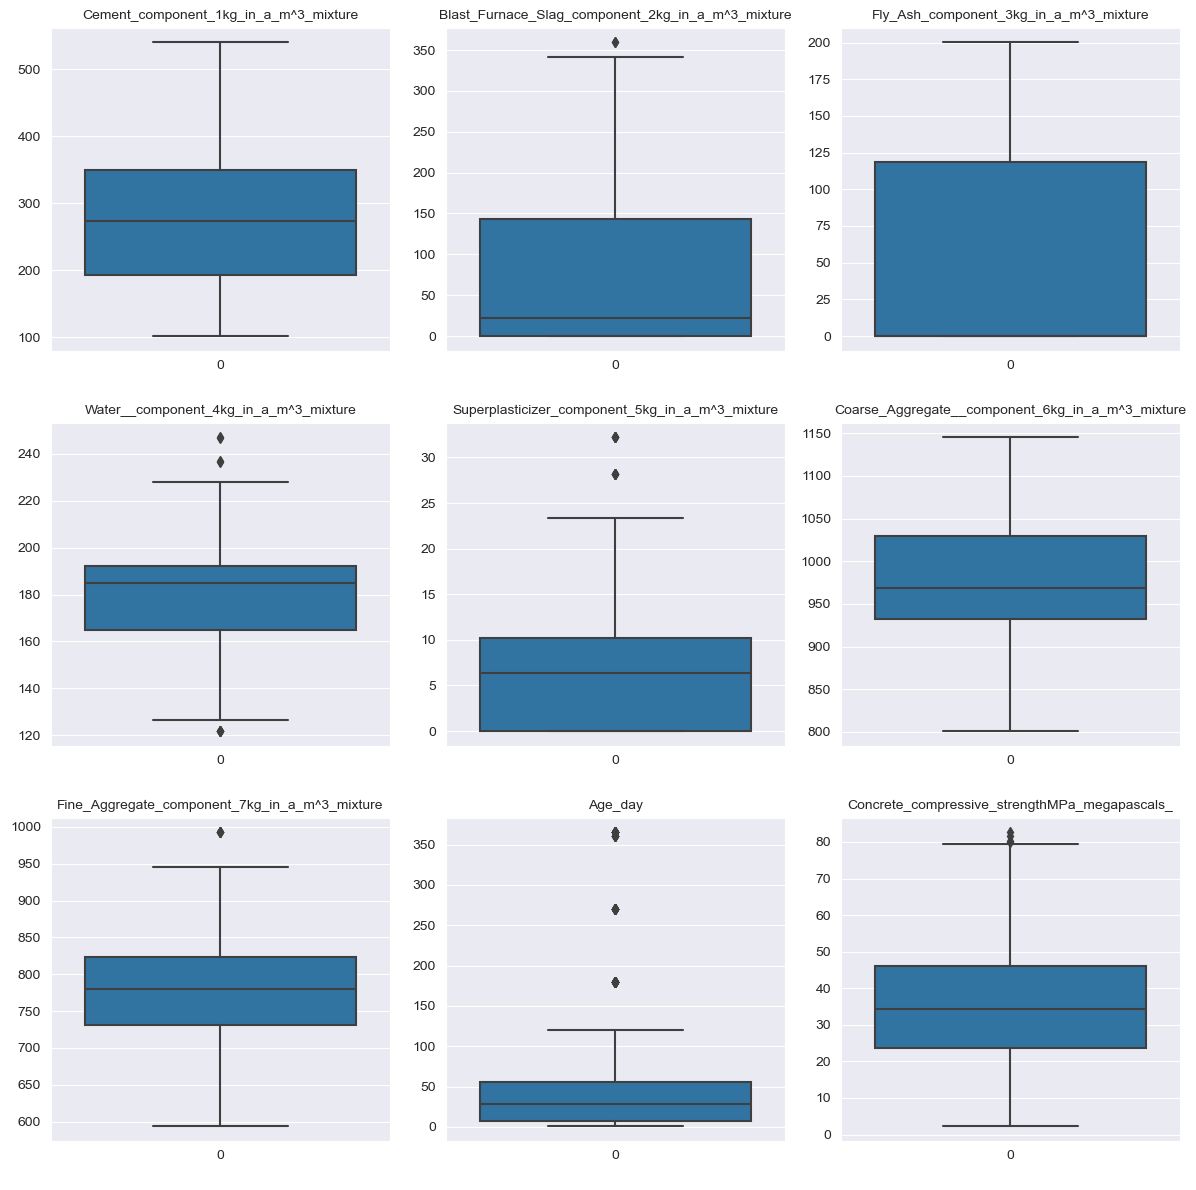

In [8]:
cols = 3
rows = int (df.shape[1] / cols) #definimos cuantos graficos haremos 3 columnas x 4 filas
size_fact = 4
plt.figure (figsize=(rows*size_fact, cols*size_fact)) #tamaño de los graficos
for i, col in enumerate (df.columns) :
    plt.subplot (rows, cols, i+1) #definimos donde va el subplot con i
    sns.boxplot (df[col]) #graficamos la columna col
    plt.title (col, fontsize = 10)
    plt.xlabel (" ")
    plt.tight_layout() #afinamos el espacio entre graficos

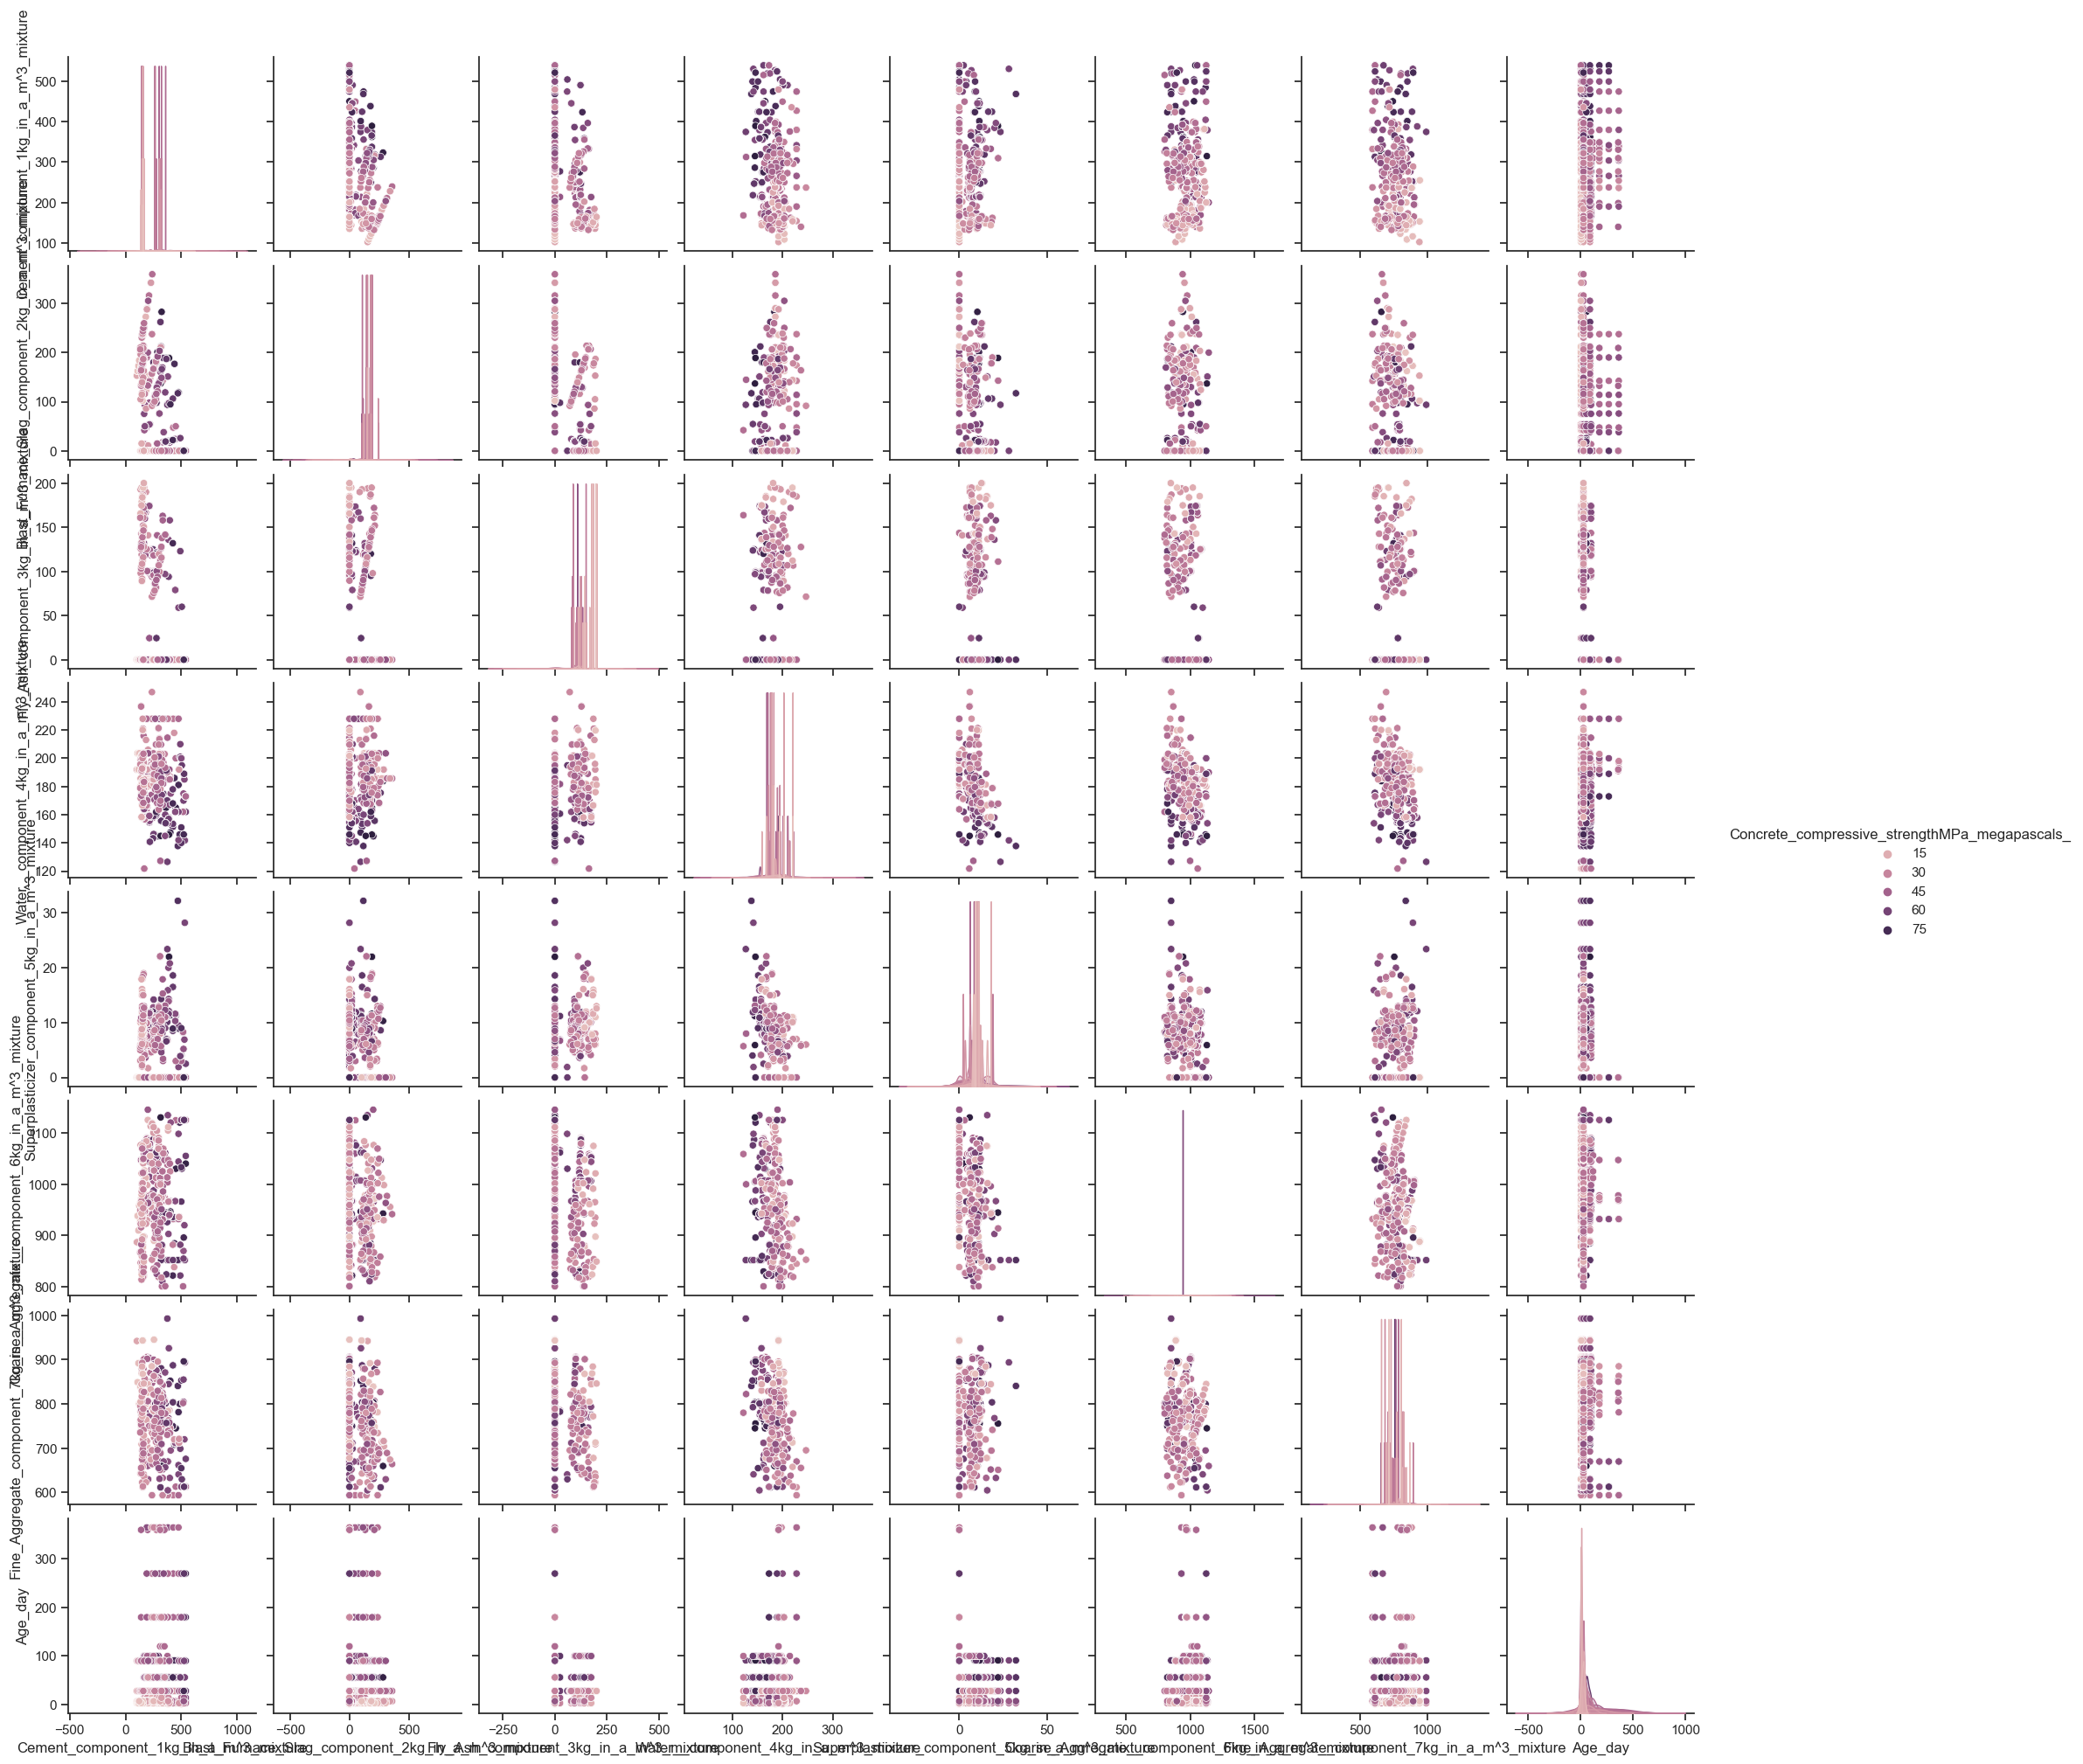

In [9]:
sns.set (style = "ticks")
sns.pairplot (df, hue="Concrete_compressive_strengthMPa_megapascals_" )

### Visualización de las variables

In [10]:
def graph_var (var, df) :
    plt.figure()
    plt.hist (df[var], bins = 20, edgecolor = "black")
    plt.xlabel (var)
    plt.ylabel ("Frecuencia")
    plt.title (f"Histograma de {var}")
    hist, bins, _ = plt.hist(df[var], bins=20)
    for i in range(len(hist)):
        plt.text(bins[i], hist[i], str(int(hist[i])), ha='left', va='bottom')
    plt.xlim(df[var].min(), df[var].max())
    mean = df[var].mean()
    median = df[var].median()
    plt.axvline (mean, c = "red", ls = "--", lw = 2, label = "Media")
    plt.axvline (median, c = "blue", ls = "--", lw = 2, label = "Mediana")
    plt.legend()

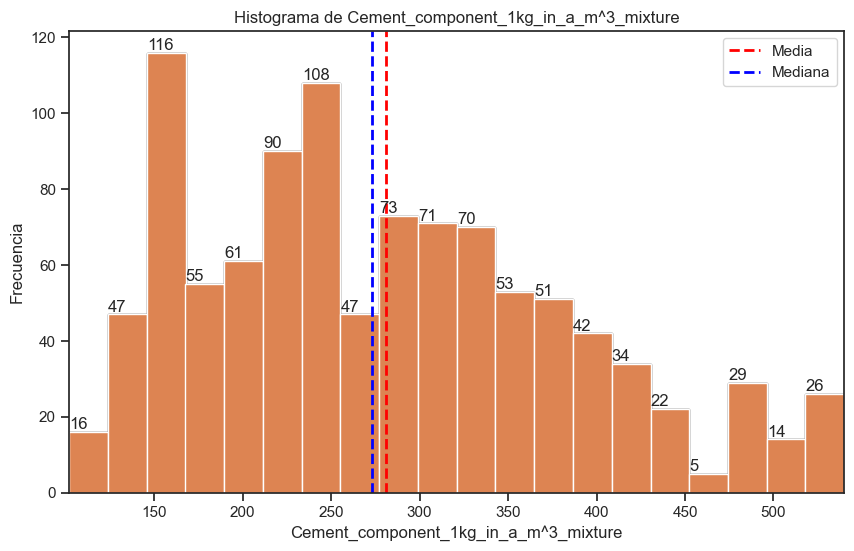

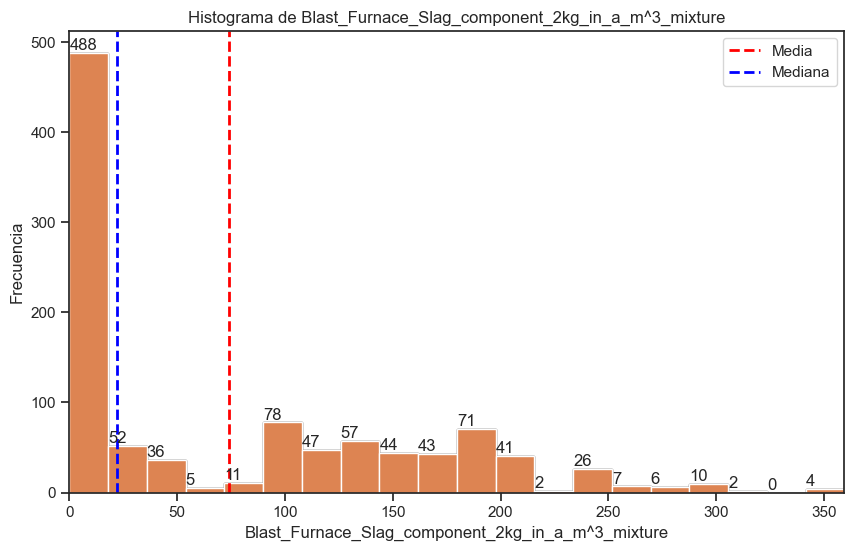

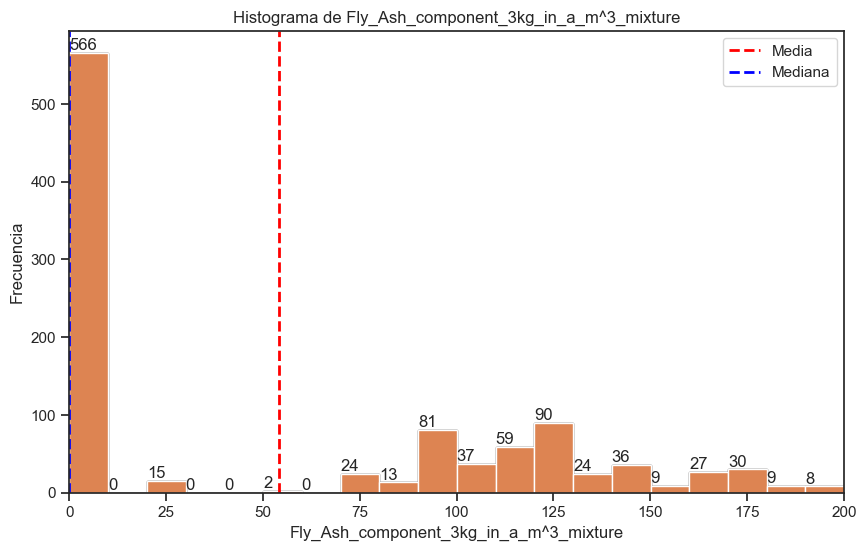

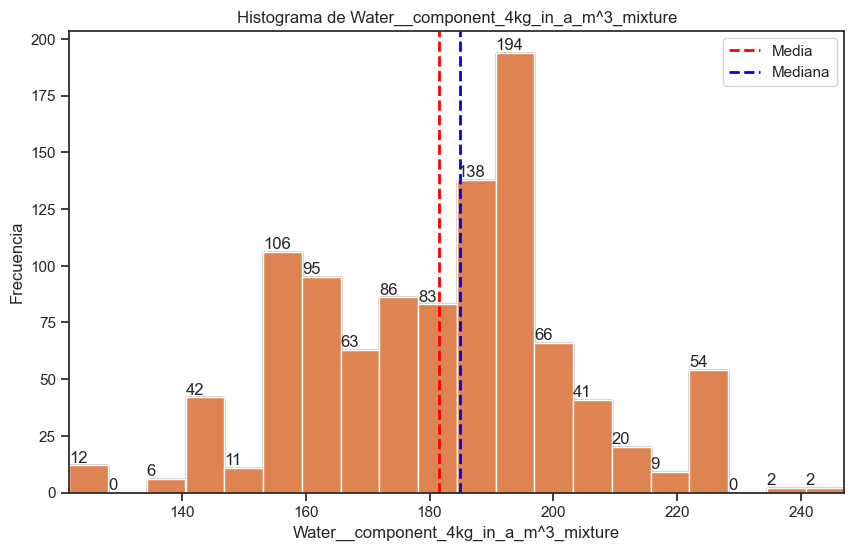

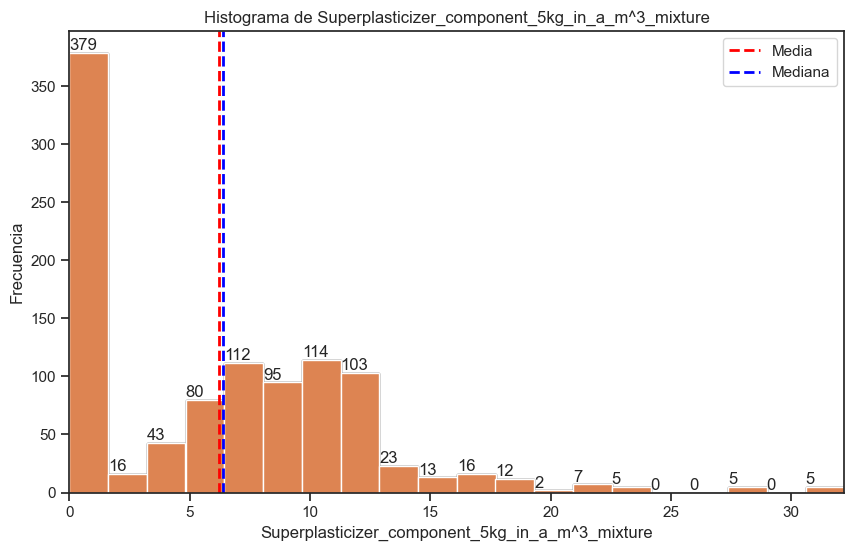

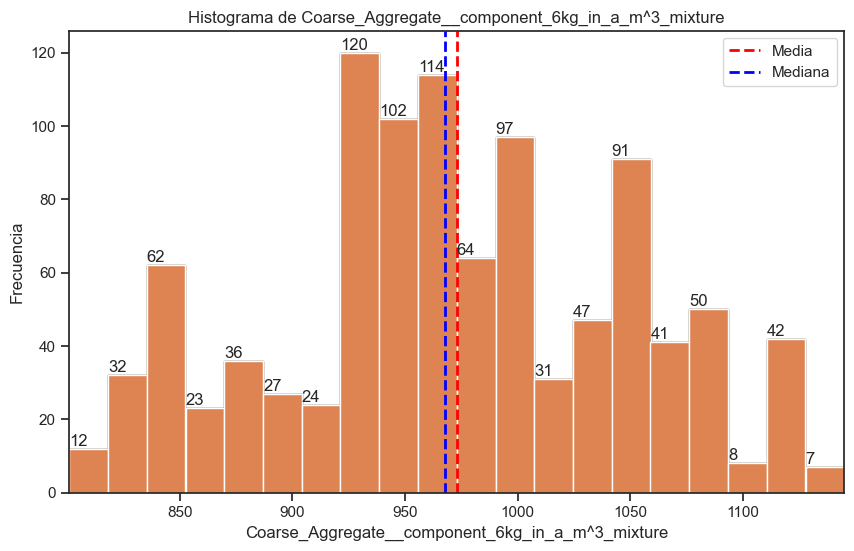

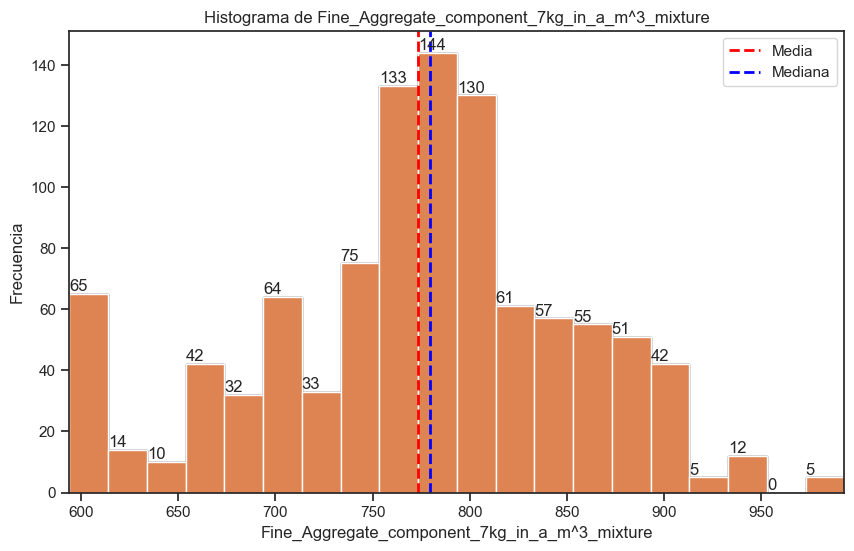

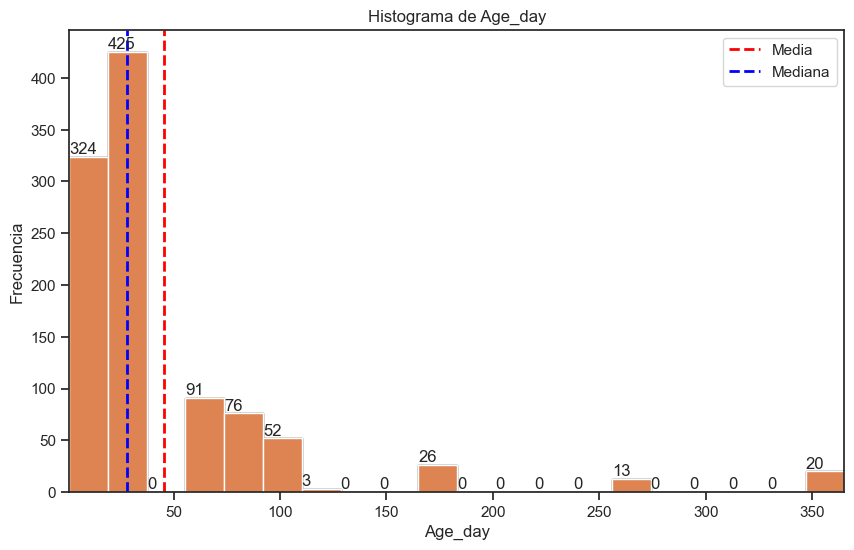

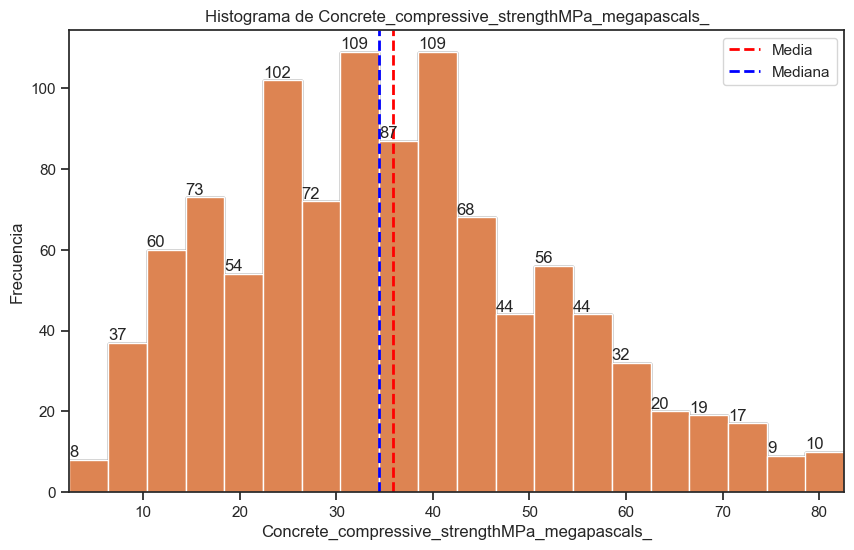

In [11]:
for variable in df.columns:
    graph_var(variable, df)

> Debido a que se utilizará pygam, no será necesario escalar las variables

## Modelación

In [12]:
from pygam import LinearGAM, s
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.model_selection import train_test_split


### Genere conjuntos de entrenamiento y validación

In [19]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.3, random_state=42)

> Generamos un 1er modelo de regresión generalizado aditivo lineal sin implementar la función Gridsearch

In [20]:
gam = LinearGAM().fit(X_train.values, y_train.values)

In [21]:
def report_gam_metrics(model, X_test, y_test):
    print('Test R^2: {0}'.format(r2_score(y_test, model.predict(X_test)).round(3)))
    print('Test RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, model.predict(X_test))).round(3)))
    print('Test Median Absolute Error:{0}'.format(median_absolute_error(y_test, model.predict(X_test)).round(3)))

In [22]:
report_gam_metrics(gam, X_test, y_test)

Test R^2: 0.881
Test RMSE: 5.673
Test Median Absolute Error:3.967


> Imprimimos el valor de lambda asociado a GAM 

> El parámetro lambda controla la regularización y la suavidad de las funciones de regresión no lineales

> Un valor alto resulta en funciones más suaves y por lo tanto, en un modelo más regularizado

> Un valor bajo resulta en funciones más flexibles y ajustadas de los datos

> El modelo de regresión GAM a sido ajustado con un valor de lambda 0.6 en cada dimensión o componente del modelo

> Podemos concluir que el modelo está utilizando un nivel moderado de regularización y suavidad para cada dimensión del modelo GAM. Esto podría significar que el modelo busca un equilibrio entre la flexibilidad y la simplicidad de las funciones de regresión no lineales para ajustarse adecuadamente a los datos de entrenamiento y generalizar bien en datos nuevos.

In [23]:
print(f"Lambda: {gam.lam}")

Lambda: [[0.6], [0.6], [0.6], [0.6], [0.6], [0.6], [0.6], [0.6]]


> Generamos un 2do modelo implementando Gridsearch con logspace de -3, 3

In [24]:
lams = np.logspace(-3, 3, 3)

> Esto se utiliza para proporcionar diferentes valores de lambda para cada dimensión al ajustar unmodelo de regresión GAM

In [25]:
lams = [lams]* len(X_train.columns)

In [26]:
gam_2 = LinearGAM(s(0) + s(1) + s(2)+ s(3) + s(4) + s(5) + s(6) + s(7), fit_intercept=True)

> Definimos un modelo GAM con varias funciones de suavizado aplicadas a cada característica del conjunto de datos. Esto permite capturar relaciones no lineales entre las características y el vector objetivo

In [27]:
gam_2.gridsearch(X_train.values, y_train.values, lam = lams)

  0% (0 of 6561) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (1 of 6561) |                       | Elapsed Time: 0:00:00 ETA:   0:19:11
  0% (2 of 6561) |                       | Elapsed Time: 0:00:00 ETA:   0:19:11
  0% (3 of 6561) |                       | Elapsed Time: 0:00:00 ETA:   0:18:33
  0% (4 of 6561) |                       | Elapsed Time: 0:00:00 ETA:   0:18:15
  0% (5 of 6561) |                       | Elapsed Time: 0:00:00 ETA:   0:18:10
  0% (6 of 6561) |                       | Elapsed Time: 0:00:01 ETA:   0:21:05
  0% (7 of 6561) |                       | Elapsed Time: 0:00:01 ETA:   0:20:39
  0% (8 of 6561) |                       | Elapsed Time: 0:00:01 ETA:   0:20:17
  0% (9 of 6561) |                       | Elapsed Time: 0:00:01 ETA:   0:19:58
  0% (10 of 6561) |                      | Elapsed Time: 0:00:01 ETA:   0:19:44
  0% (11 of 6561) |                      | Elapsed Time: 0:00:01 ETA:   0:19:39
  0% (12 of 6561) |                     

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + intercept,
   tol=0.0001, verbose=False)

- Del resumen podemos concluir lo siguiente:
    - Eficacia del modelo: El Pseudo R-Squared es aproximadamente 0.927, lo que indica que el modelo tiene una alta efectividad para explicar la relación entre las características y el vector objetivo. Este valor alto sugiere que el modelo explica una gran parte de la variabilidad en los datos.
    - Distribución y escala: El modelo asume una distribución normal de los errores y tiene una escala de aproximadamente 23.5961. La distribución normal de errores es comúnmente asumida en los modelos lineales.
    - Coeficientes de las funciones de suavizado: Cada función de suavizado (s(i)) tiene un valor de lambda (λ) asociado. Los valores de lambda son [1.0], [0.001], y así sucesivamente. Los valores de lambda controlan la suavidad de las funciones de suavizado. En este modelo, las funciones de suavizado parecen tener un valor de lambda de [1.0] en su mayoría, lo que indica que estas funciones son relativamente más suaves.
    - Importancia de las características: Las funciones de suavizado muestran significancia estadística en todas las características, ya que el valor p para cada función (P > x) es extremadamente pequeño (1.11e-16). Esto sugiere que todas las características tienen un impacto significativo en el modelo y son relevantes para predecir la variable objetivo.
    - Intercepto: El intercepto también muestra una significancia estadística muy alta (P > x = 1.11e-16). Esto indica que el término de intercepción (constante) es estadísticamente significativo y ha sido incluido en el modelo.

In [29]:
gam_2.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     91.9857
Link Function:                     IdentityLink Log Likelihood:                                 -2955.0229
Number of Samples:                          721 AIC:                                             6096.0172
                                                AICc:                                            6123.8932
                                                GCV:                                               30.5119
                                                Scale:                                             23.5961
                                                Pseudo R-Squared:                                    0.927
Feature Function                  Lam

In [30]:
report_gam_metrics(gam_2, X_test, y_test)

Test R^2: 0.881
Test RMSE: 5.682
Test Median Absolute Error:3.673


- En general, ambos modelos muestran un rendimiento muy similar en el conjunto de prueba en términos de R^2 y RMSE, pero el modelo con GridSearch muestra una mejora marginal en términos de la métrica Median Absolute Error, lo que indica una mayor precisión en la mediana de los errores de predicción. Sin embargo, la diferencia en las métricas es pequeña y en general, ambos modelos tienen un buen rendimiento de predicción en el conjunto de prueba.

## Dependencia Parcial

- La dependencia parcial es una técnica utilizada para comprender cómo una variable independiente afecta al vector objetivo manteniendo fijas todas las demás variables
- En otras palabras evalúa cómo cambia el vector objetivo al variar la característica de interés manteniendo constante las demás variables

In [38]:
def dependencia (model) :
    fig, axs = plt.subplots(2,4, figsize = (20,6))
    titles = X_train.columns
    for i, ax in enumerate(axs.flatten()):
        XX = model.generate_X_grid(term=i) # Muestreo de puntos
        ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX))
        ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
        ax.scatter(X_train[titles[i]], [0] * len(X_train[titles[i]]), marker = '|', alpha = .5)
        ax.set_title(titles[i])

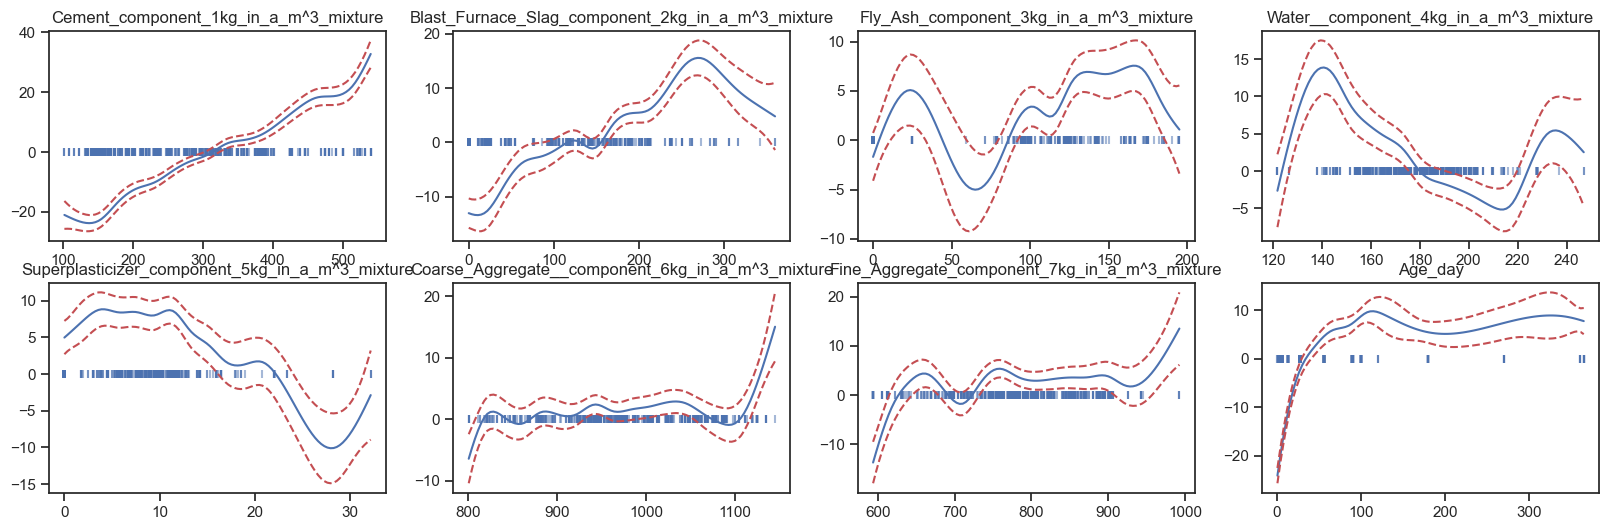

In [39]:
dependencia (gam)

- En base a los gráficos de dependencia parcial, se puede observar que los atributos que están más asociados a mayores niveles de resistencia son:
    - Cement (component 1)(kg in a m^3 mixture)
    - Age (day)
    - Water  (component 4)(kg in a m^3 mixture)
- En base a los gráficos de dependencia parcial, se puede observar que los atributos que están más asociados a menores niveles de resistencia son:
    - Blast Furnace Slag (component 2)(kg in a m^3 mixture)
    - Fine Aggregate (component 7)(kg in a m^3 mixture)